# Detect Faces

1. Haarcascades

In [20]:
import cv2
import numpy as np
from PIL import Image
import imutils
import time

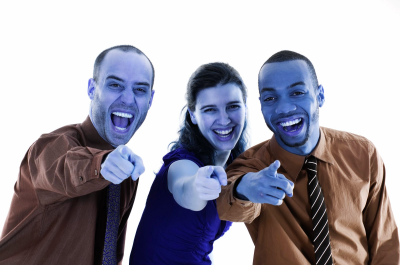

In [2]:
im = cv2.imread('/content/drive/My Drive/photos/laugh2.jpg')
resized_img = imutils.resize(im, width=400, height=500)
im_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

Image.fromarray(resized_img)

In [23]:
# detect faces


faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 
                                            "haarcascade_frontalface_default.xml")
prev_time = time.time()
faces = faceCascade.detectMultiScale(
                im_gray,
                scaleFactor=1.5,
                minNeighbors=5,
                minSize=(20, 20)
        )

cur_time = time.time()
print('Time required: {:.2f} seconds'.format(cur_time - prev_time))
print("Found {0} Faces!".format(len(faces)))  

Time required: 0.02 seconds
Found 3 Faces!


Three parameters to consider here

*  scaleFactor: factor for image-pyramid, 
larger is less levels of pyramids and faster, smaller is more pyramids are explored so detection is a bit slower.

*  minNeighbors: minimum number of detected bounding boxes.

*  minSize: minimum size of face(x * y)

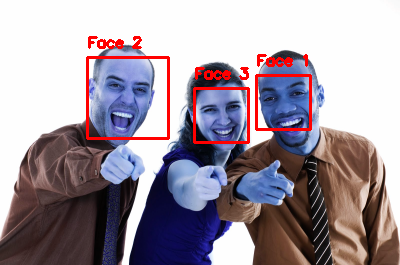

In [ ]:
# draw faces

image = resized_img.copy()

for i, (x,y,w,h) in enumerate(faces):
    cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(image, "Face {0}".format(i + 1), (x, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.50, (255,0,0), 2)
  
Image.fromarray(image)

2. Face Detection library (requires GPU)

In [3]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=5886a1a7a59b9b2afe213d37db47c1b7f95d05574fe3b3013a85f9b342a798ce
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [24]:
import face_recognition

image = face_recognition.load_image_file("/content/drive/My Drive/photos/laugh2.jpg")
prev_time = time.time()
face_locations = face_recognition.face_locations(image) # deep learning based model trained on faces

cur_time = time.time()
print('Time required: {:.2f} seconds'.format(cur_time - prev_time))

Time required: 1.23 seconds


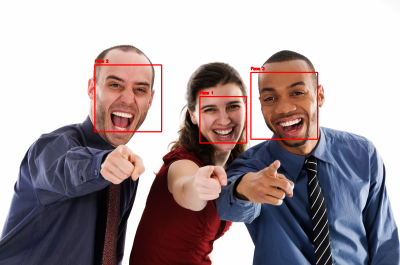

In [ ]:
for i, (top, right, bottom, left) in enumerate(face_locations):
    cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 3)
    cv2.putText(image, "Face {0}".format(i + 1), (left, top - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.50, (255,0,0), 3)
    
resized_img = imutils.resize(image, width=400, height=500) 
Image.fromarray(resized_img)

3. Using dlib

Time required: 0.08 seconds


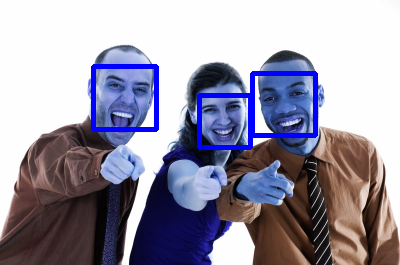

In [25]:
import dlib
image = resized_img.copy()

detector = dlib.get_frontal_face_detector() # pre-trained HOG + Linear SVM

prev_time = time.time()
faces = detector(image, 1)
cur_time = time.time()
print('Time required: {:.2f} seconds'.format(cur_time - prev_time))

for face in faces:
  x = face.left()
  y = face.top()
  w = face.right() - face.left()
  h = face.bottom() - face.top()

  cv2.rectangle(image, (x, y), (x+w, y+h), (0,0,255), 3)

Image.fromarray(image)

# Detect facial landmarks

1. Using dlib

In [28]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2020-06-24 03:39:46--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  18.3MB/s    in 5.2s    

2020-06-24 03:39:51 (11.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [29]:
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
# example facial landmarks(68 points) dictionary

FACIAL_LANDMARKS_IDXS = dict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
])

In [30]:
from imutils import face_utils
import dlib

image = resized_img.copy()
landmarks_ids = face_utils.FACIAL_LANDMARKS_68_IDXS # but still we can use this 
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

In [31]:
# loop through faces and draw landmarks

prev_time = time.time()

for face in faces:
  shape = predictor(image, face) # predict landmarks for image to face loc
  shape = face_utils.shape_to_np(shape) # to np array

  for x, y in shape:
    cv2.circle(image, (x,y), 1, (0,0,255), 3)

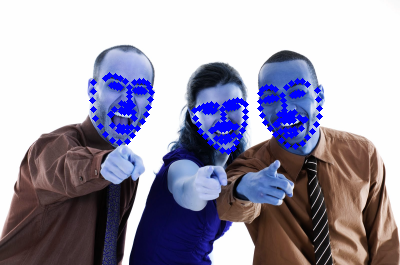

In [ ]:
Image.fromarray(image)

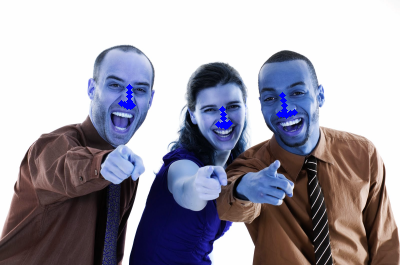

In [ ]:
# for specific part 

image = resized_img.copy()
for face in faces:
  shape = predictor(image, face)
  shape = face_utils.shape_to_np(shape) 
  
  for name, (i,j) in landmarks_ids.items():
    if name == 'nose':
      for x,y in shape[i:j]:
        cv2.circle(image, (x,y), 1, (0,0,255), 3)

Image.fromarray(image)     

2. Using face_recognition library

In [17]:
face_landmarks_list = face_recognition.face_landmarks(image)

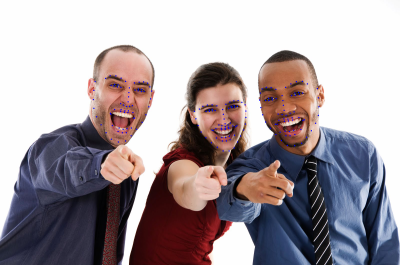

In [19]:
for face in face_landmarks_list:
  for shape_name in face:
    for x,y in face[shape_name]:
      cv2.circle(image, (x,y), 1, (0,0,255), 2)

image = imutils.resize(image, width=400)

Image.fromarray(image)

Summary:

* Speed (harcascades > dlib > facerecognition_library):
Fastest was haarcascades with 0.2 seconds.
* Accuray (facerecognition_library > dlib > harcascades): Most accurate is deep learning based method.
* Computency (harcascades > dlib > facerecognition_library): facerecognition_library requires GPU other two are fine with CPU.

